# Load Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lacbox.io import ReadHAWC2
import matplotlib
import scienceplots


matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])


# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'normal'

# Plot C1-C2-C3 (With Max Torque = 18.966e6 Nm)

Text(0.5, 0, 'Time [s]')

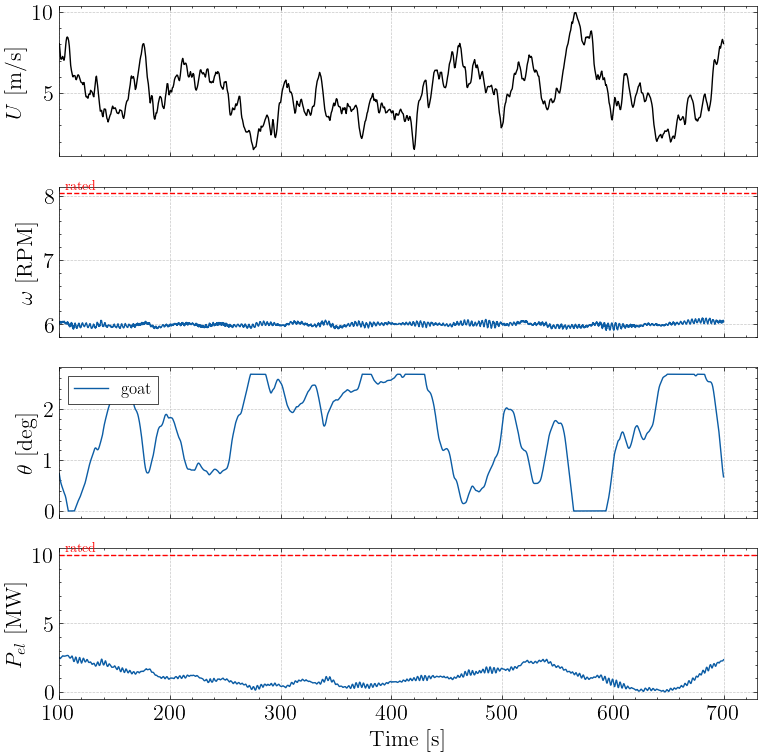

In [6]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../our_design/res_turb/tca/BB_redesign_turb_tca_05.0_14592.hdf5',
]

labels = [
    'goat',
]

# savename = 'part_3_c1c2c3.pdf'

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(4, 1, sharex='all', figsize=(9, 9))

# Plot WSP on the first subplot
# for wsp, t in zip(wsp_data, time_data):
axs[0].plot(time_data[0], wsp_data[0], 'k')
axs[0].set_ylabel(r'$U$ [m/s]')
axs[0].set_xlim(left=100)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Omega on the second subplot
for omega, t in zip(omega_data, time_data):
    axs[1].plot(t, omega)
axs[1].set_ylabel(r'$\omega$ [RPM]')
axs[1].set_xlim(left=100)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)
# Add horizontal line and label for Omega
axs[1].axhline(y=8.036, color='r', linestyle='--', linewidth=1)
axs[1].text(105, 8.036, 'rated', color='r', va='bottom', ha='left', fontsize=10)

# Plot Pitch on the third subplot
for pitch, t in zip(pitch_data, time_data):
    axs[2].plot(t, pitch)
axs[2].set_ylabel(r'$\theta$ [deg]')
axs[2].set_xlim(left=100)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.7)


# Plot P_elec on the fourth subplot
for pelec, t in zip(pelec_data, time_data):
    axs[3].plot(t, pelec)
axs[3].set_ylabel(r'$P_{el}$ [MW]')
axs[3].set_xlim(left=100)
axs[3].grid(linestyle='--', linewidth=0.5, alpha=0.7)
# Add horizontal line and label for P_elec
axs[3].axhline(y=10, color='r', linestyle='--', linewidth=1)
axs[3].text(105, 10, 'rated', color='r', va='bottom', ha='left', fontsize=10)

# Legend
legend = axs[2].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper left')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
# plt.savefig(savename, dpi=300, bbox_inches='tight')


# Plot C4-C5-C6 (With Max Torque = 18.966e6 Nm)

In [ ]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_redesign_step_wind_C4_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C5_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C6_Max_Torque.hdf5'
]

labels = [
    'C4',
    'C5',
    'C6'
]

savename = 'part_3_c4c5c6.pdf'

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(4, 1, sharex='all', figsize=(9, 9))

# Plot WSP on the first subplot
# for wsp, t in zip(wsp_data, time_data):
axs[0].plot(time_data[0], wsp_data[0], 'k')
axs[0].set_ylabel(r'$U$ [m/s]')
axs[0].set_xlim(left=100)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Omega on the second subplot
for omega, t in zip(omega_data, time_data):
    axs[1].plot(t, omega)
axs[1].set_ylabel(r'$\omega$ [RPM]')
axs[1].set_xlim(left=100)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)
# Add horizontal line and label for Omega
axs[1].axhline(y=8.036, color='r', linestyle='--', linewidth=1)
axs[1].text(105, 8.036, 'rated', color='r', va='bottom', ha='left', fontsize=10)

# Plot Pitch on the third subplot
for pitch, t in zip(pitch_data, time_data):
    axs[2].plot(t, pitch)
axs[2].set_ylabel(r'$\theta$ [deg]')
axs[2].set_xlim(left=100)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.7)


# Plot P_elec on the fourth subplot
for pelec, t in zip(pelec_data, time_data):
    axs[3].plot(t, pelec)
axs[3].set_ylabel(r'$P_{el}$ [MW]')
axs[3].set_xlim(left=100)
axs[3].grid(linestyle='--', linewidth=0.5, alpha=0.7)
# Add horizontal line and label for P_elec
axs[3].axhline(y=10, color='r', linestyle='--', linewidth=1)
axs[3].text(105, 10, 'rated', color='r', va='bottom', ha='left', fontsize=10)

# Legend
legend = axs[2].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper left')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

# For viridis of 5 lines

In [ ]:
import matplotlib.cm as cm
viridis = cm.get_cmap('viridis_r', 5)  # Get 5 distinct colors from the colormap
linestyles = [
    '-', '-', '-.', '-', '-'
]

# C1-C7 Different $\omega$

In [62]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_redesign_step_wind_C7_0.03_0.7_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.04_0.7_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C1_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.06_0.7_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.07_0.7_Max_Torque.hdf5'
]

labels = [
    r'$\omega=0.03$',
    r'$\omega=0.04$',
    r'$\omega=0.05$ (C1)',
    r'$\omega=0.06$',
    r'$\omega=0.07$'
]

savename = 'part_3_c1c7_omega_appendix.pdf'

# Shading
x_start, x_end = (428, 468)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(4, 1, sharex='all', figsize=(9, 9))

# Plot WSP on the first subplot
# for wsp, t in zip(wsp_data, time_data):
axs[0].plot(time_data[0], wsp_data[0], 'k')
axs[0].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[0].set_ylabel(r'$U$ [m/s]')
axs[0].set_xlim(left=100)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[1].plot(t, omega, color=viridis(i))
axs[1].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[1].set_ylabel(r'$\omega$ [RPM]')
axs[1].set_xlim(left=100)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[2].plot(t, pitch, color=viridis(i))
axs[2].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[2].set_ylabel(r'$\theta$ [deg]')
axs[2].set_xlim(left=100)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.7)


# Plot P_elec on the fourth subplot
for i, (pelec, t) in enumerate(zip(pelec_data, time_data)):
    axs[3].plot(t, pelec, color=viridis(i))
axs[3].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[3].set_ylabel(r'$P_{el}$ [MW]')
axs[3].set_xlim(left=100)
axs[3].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[2].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper left')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

### ZOOM-IN

In [73]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_redesign_step_wind_C7_0.03_0.7_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.04_0.7_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C1_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.06_0.7_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.07_0.7_Max_Torque.hdf5'
]

labels = [
    r'$\omega=0.03$ Hz',
    r'$\omega=0.04$ Hz',
    r'$\omega=0.05$ Hz (C1)',
    r'$\omega=0.06$ Hz',
    r'$\omega=0.07$ Hz'
]

savename = 'part_3_c1c7_omega_zoom.pdf'

# For Non-Dim
omega_rated = 8.036
x_start, x_end = (428, 468)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(9, 7))

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[0].plot(t, omega/omega_rated, color=viridis(i), linestyle=linestyles[i])
axs[0].set_ylabel(r'$\omega/\omega_{rated}$ [-]')
axs[0].set_xlim(left=x_start, right=x_end)
axs[0].set_ylim(0.95, 1.1)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[1].plot(t, pitch, color=viridis(i), linestyle=linestyles[i])
axs[1].set_ylabel(r'$\theta$ [deg]')
axs[1].set_xlim(left=x_start, right=x_end)
axs[1].set_ylim(0, 10)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[0].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=11, loc='upper right')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

# C1-C7 Different $\zeta$

In [60]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_redesign_step_wind_C7_0.05_0.5_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.05_0.6_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C1_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.05_0.8_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.05_0.9_Max_Torque.hdf5'
]

labels = [
    r'$\zeta=0.5$',
    r'$\zeta=0.6$',
    r'$\zeta=0.7$ (C1)',
    r'$\zeta=0.8$',
    r'$\zeta=0.9$'
]

savename = 'part_3_c1c7_zeta_appendix.pdf'

# Shading
x_start, x_end = (428, 468)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(4, 1, sharex='all', figsize=(9, 9))

# Plot WSP on the first subplot
# for wsp, t in zip(wsp_data, time_data):
axs[0].plot(time_data[0], wsp_data[0], 'k')
axs[0].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[0].set_ylabel(r'$U$ [m/s]')
axs[0].set_xlim(left=100)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[1].plot(t, omega, color=viridis(i))
axs[1].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[1].set_ylabel(r'$\omega$ [RPM]')
axs[1].set_xlim(left=100)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[2].plot(t, pitch, color=viridis(i))
axs[2].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[2].set_ylabel(r'$\theta$ [deg]')
axs[2].set_xlim(left=100)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.7)


# Plot P_elec on the fourth subplot
for i, (pelec, t) in enumerate(zip(pelec_data, time_data)):
    axs[3].plot(t, pelec, color=viridis(i))
axs[3].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[3].set_ylabel(r'$P_{el}$ [MW]')
axs[3].set_xlim(left=100)
axs[3].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[2].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper left')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

### ZOOM-IN

In [74]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_redesign_step_wind_C7_0.05_0.5_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.05_0.6_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C1_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.05_0.8_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.05_0.9_Max_Torque.hdf5'
]

labels = [
    r'$\zeta=0.5$',
    r'$\zeta=0.6$',
    r'$\zeta=0.7$ (C1)',
    r'$\zeta=0.8$',
    r'$\zeta=0.9$'
]

savename = 'part_3_c1c7_zeta_zoom.pdf'

# For Non-Dim
omega_rated = 8.036
x_start, x_end = (428, 468)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(9, 7))

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[0].plot(t, omega/omega_rated, color=viridis(i), linestyle=linestyles[i])
axs[0].set_ylabel(r'$\omega/\omega_{rated}$ [-]')
axs[0].set_xlim(left=x_start, right=x_end)
axs[0].set_ylim(0.95, 1.1)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[1].plot(t, pitch, color=viridis(i), linestyle=linestyles[i])
axs[1].set_ylabel(r'$\theta$ [deg]')
axs[1].set_xlim(left=x_start, right=x_end)
axs[1].set_ylim(0, 10)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[0].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=11, loc='upper right')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

# Extra Bullshit

In [75]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../res/BB_redesign_step_wind_C1_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.06_0.5.hdf5',
    '../res/BB_redesign_step_wind_C7_0.06_0.6.hdf5',
    '../res/BB_redesign_step_wind_C7_0.06_0.7_Max_Torque.hdf5',
    '../res/BB_redesign_step_wind_C7_0.06_0.8_Max_Torque.hdf5',
]

labels = [
    r'$\omega=0.05$, $\zeta=0.7$ (C1)',
    r'$\omega=0.06$, $\zeta=0.5$',
    r'$\omega=0.06$, $\zeta=0.6$',
    r'$\omega=0.06$, $\zeta=0.7$',
    r'$\omega=0.06$, $\zeta=0.8$'
]

savename = 'part_3_c1c7_extra_bullshit.pdf'

# For Non-Dim
omega_rated = 8.036
x_start, x_end = (428, 468)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(9, 7))

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[0].plot(t, omega/omega_rated)
axs[0].set_ylabel(r'$\omega/\omega_{rated}$ [-]')
axs[0].set_xlim(left=x_start, right=x_end)
axs[0].set_ylim(0.95, 1.1)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[1].plot(t, pitch)
axs[1].set_ylabel(r'$\theta$ [deg]')
axs[1].set_xlim(left=x_start, right=x_end)
axs[1].set_ylim(0, 10)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[0].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=11, loc='upper right')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')